<a href="https://colab.research.google.com/github/mttno1/git_folder/blob/master/Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Start Pixel: (1172, 472) - End Pixel: (1317, 718)


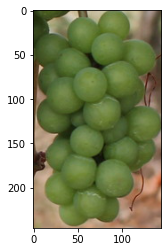

Start Pixel: (1562, 677) - End Pixel: (1693, 902)


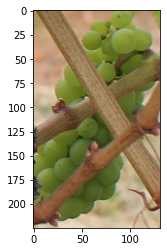

Start Pixel: (1305, 3) - End Pixel: (1538, 509)


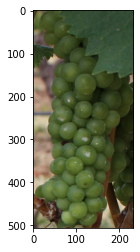

Start Pixel: (1466, 167) - End Pixel: (1619, 462)


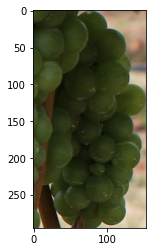

Start Pixel: (997, 227) - End Pixel: (1217, 622)


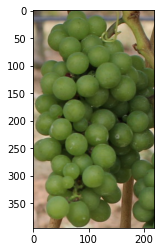

Start Pixel: (704, 783) - End Pixel: (927, 1237)


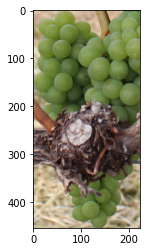

Start Pixel: (829, 586) - End Pixel: (1023, 943)


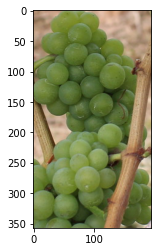

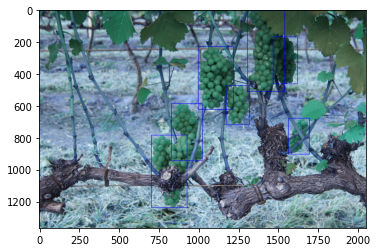

In [185]:
import os
import os.path
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

dataset = r'/content/drive/MyDrive/Grape_Project/test_dataset'
training_set = r'/content/drive/MyDrive/Grape_Project/test_training_set/'

img = cv2.imread('/content/drive/MyDrive/Grape_Project/datasets/wgisd/data/CDY_2016.jpg')
dh, dw, _ = img.shape

fl = open('/content/drive/MyDrive/Grape_Project/datasets/wgisd/data/CDY_2016.txt', 'r')
data = fl.readlines()
fl.close()
img1 = Image.open(r"/content/drive/MyDrive/Grape_Project/datasets/wgisd/data/CDY_2016.jpg")
for dt in data:

    # Split string to float
    _, x, y, w, h = map(float, dt.split(' '))

    # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
    # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
    
    left = int((x - w / 2) * dw) # left edge coordinate
    right = int((x + w / 2) * dw) # right edge coordinate
    top = int((y - h / 2) * dh) # top edge coordinate
    bottom = int((y + h / 2) * dh) # bottom edge cordinate
    
    if left < 0:
        left = 0
    if right > dw - 1:
        right = dw - 1
    if top < 0:
        top = 0
    if bottom > dh - 1:
        bottom = dh - 1
    
    print("Start Pixel:", (left,top),'-',"End Pixel:", (right,bottom)) # (x,y) print

    cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 1024), 2)
    crop_img = img1.crop((left, top , right, bottom))
    plt.imshow(crop_img)    
    plt.show()
    
#plt.imshow(crop_img1)    
plt.imshow(img)
plt.show()